In [24]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('../dataset/pima_indians_diabetes.csv')
data.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
X = data.iloc[:,:8]
y = data.iloc[:,8]

In [5]:
X.head()

,preg,plas,pres,skin,test,mass,pedi,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [6]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: class, dtype: int64

### Model to evaluate

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
lreg = LogisticRegression(max_iter=400)

### 1. Train test split

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [12]:
lreg.fit(X_train,y_train)

LogisticRegression(max_iter=400)

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       401
           1       0.71      0.56      0.63       213

    accuracy                           0.77       614
   macro avg       0.75      0.72      0.73       614
weighted avg       0.76      0.77      0.76       614



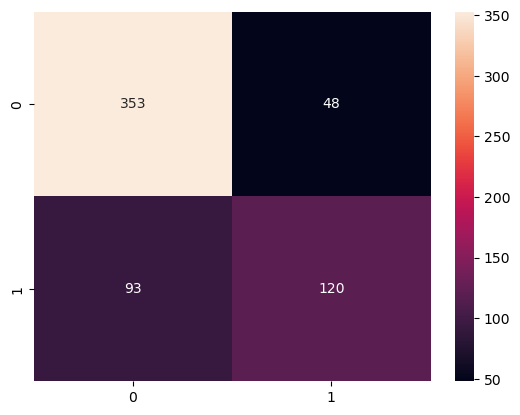

In [15]:
yhat_train = lreg.predict(X_train)
cm = confusion_matrix(y_train, yhat_train)
print(classification_report(y_train, yhat_train))
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



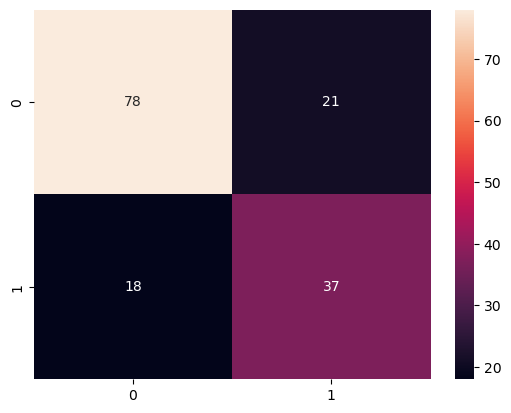

In [16]:
yhat_test = lreg.predict(X_test)
cm = confusion_matrix(y_test, yhat_test)
print(classification_report(y_test, yhat_test))
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

### 2. kfold cross validation

In [17]:
from sklearn.model_selection import KFold, cross_val_score

In [18]:
kfold = KFold(n_splits=10)

In [19]:
results = cross_val_score(lreg,X,y,cv=kfold, scoring='accuracy')
results

array([0.68831169, 0.81818182, 0.76623377, 0.68831169, 0.77922078,
       0.79220779, 0.84415584, 0.83116883, 0.75      , 0.80263158])

In [26]:
avg_acc = results.mean()
avg_acc

0.7760423786739576

In [29]:
print(f'The average accuracy of the model is {avg_acc:0.2f}')
print(f'The standard deviation of accuracy of the model is {np.std(results):0.4f}')

The average accuracy of the model is 0.78
The standard deviation of accuracy of the model is 0.0516


### 3. Leave one out

In [30]:
from sklearn.model_selection import LeaveOneOut, cross_val_score

In [31]:
loocv = LeaveOneOut()

In [33]:
results = cross_val_score(lreg,X,y,cv=loocv, scoring='accuracy')
avg_acc = results.mean()

In [34]:
print(f'The average accuracy of the model is {avg_acc:0.2f}')

The average accuracy of the model is 0.78
